In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  


%matplotlib inline

In [2]:
data = pd.read_csv("./data.csv")   
data.head(5)   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()        

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
print(data.groupby('Outcome').size())   #grouper les donnees par outcome

Outcome
0    500
1    268
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

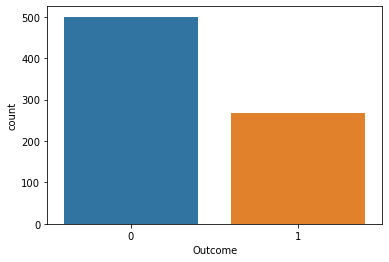

In [9]:
import seaborn as sns
sns.countplot(x = 'Outcome',data = data)

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
dataset_new = data

In [12]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [13]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [16]:
data1 = pd.DataFrame(dataset_scaled)
dataset_scaled

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

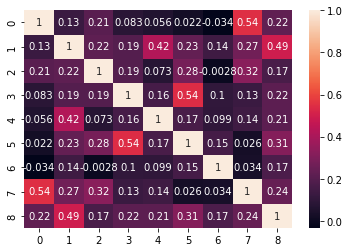

In [17]:
# Heatmap
sns.heatmap(data1.corr(), annot = True)
plt.show()

In [18]:
# [Glucose, Insulin, BMI]
X = data1.iloc[:, [1,4,5]].values
Y = data1.iloc[:, 8].values
print(X)
print(Y)
print(data1)

[[0.67096774 0.17013008 0.31492843]
 [0.26451613 0.17013008 0.17177914]
 [0.89677419 0.17013008 0.10429448]
 ...
 [0.49677419 0.11778846 0.16359918]
 [0.52903226 0.17013008 0.24335378]
 [0.31612903 0.17013008 0.24948875]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


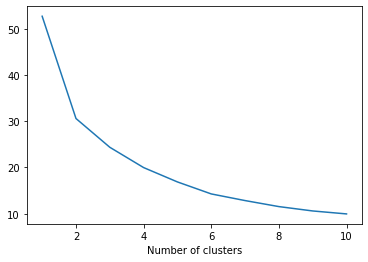

In [19]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(k).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.show()

197
247
129
[0.41624365482233505, 0.08502024291497975, 0.7674418604651163, 0.3384615384615385]
[0, 1, 2, 3]
result index :  2


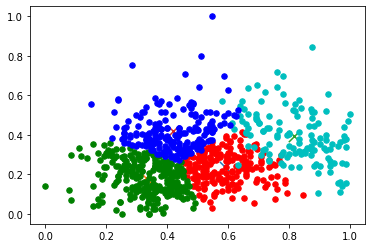

In [20]:
import math

class K_Means:
    
    def __init__(self, k, iterations = 600):
        self.k = k
        self.iterations = iterations
        self.centers = {}

    
    def distance(self, point, center):
        res=0
        for i in range(len(point)):
          res+=(point[i]-center[i])**2
        return math.sqrt(res)

    def isEqual(self, old_center, new_center):
        for i in range(len(old_center)):
          if old_center[i]!=new_center[i]:
            return False
        return True

    
    
    def fit(self, data):
        for i in range(self.k):
            self.centers[i] = data[i]
        
        for i in range(self.iterations):
            self.groupes = {}
            self.values = {}

            for j in range(self.k):
                self.groupes[j] = []
                self.values[j] = []
            
            indice=0
            for point in data:
                distances = []
                for index in self.centers:
                    distance = self.distance(point,self.centers[index])
                    distances.append(distance)
                min_distance = distances.index(min(distances))
                self.groupes[min_distance].append(point)
                self.values[min_distance].append(Y[indice])
                indice+=1
            previous = dict(self.centers)


            for groupe_index in self.groupes:
                self.centers[groupe_index] = np.average(self.groupes[groupe_index], axis = 0)
             
            noChange = True
            for center in self.centers:
                old_center = previous[center]
                new_center = self.centers[center]
                if self.isEqual(old_center,new_center)==False:
                    noChange = False
                    break
            if noChange:
                break
                
    def predict(self,data):
        distances=[]
        for center in self.centers:
          distance = self.distance(data,self.centers[center])
          distances.append(distance)
        result = distances.index(min(distances))
        return result


                

K=4
k_means = K_Means(K)
k_means.fit(X)
    
    
colors = 10*["r", "g", "c", "b", "k"]

for center in k_means.centers:
    plt.scatter(k_means.centers[center][0], k_means.centers[center][2], s = 130, marker = "x")

centers=[]
i=0
for groupe in k_means.groupes:
    centers.append(i)
    i+=1
    for features in k_means.groupes[groupe]:
        plt.scatter(features[0], features[2], color = colors[groupe],s = 30)
    
        
result = k_means.predict([0.53,0.54,0.5253])
    
print(len(k_means.groupes[0]))
print(len(k_means.groupes[1]))
print(len(k_means.groupes[2]))
percentages=[]
for value in k_means.values:
    sum=0
    for point in k_means.values[value]:
        sum+=point
    percentages.append(sum/len(k_means.groupes[value]))
print(percentages)
print(centers)
print("result index : ",result)